In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import *

## 1. Lithopheric cooling

$T(z) = T_{s} + (T_{m} - T_{s})erf(\frac{z}{(2kt)^.5})$

In [2]:
Ts = 473 
Tm = 1300
Tz = 600
kappa = 1*1e-6/3.17098e-8     ## in m2/yr

In [4]:
def halfspacecooling(tzlist):
    t = tzlist[0]
    z = tzlist[1]
    
    Ts = 473
    Tm = 1300
    kappa = 1*1e-6/3.17098e-8  
    
    T = np.zeros_like(t)
    T = Ts + (Tm-Ts)*erf(z/np.sqrt(2*kappa*t))
    
    return T

depth = np.linspace(0, 200e3, 1000)
age = np.linspace(0, 4.5e9, 10000)

t, d = np.meshgrid(age, depth)
T = halfspacecooling([t, d])

/tmp/ipykernel_3285/1024951780.py:10: RuntimeWarning: divide by zero encountered in divide
  T = Ts + (Tm-Ts)*erf(z/np.sqrt(2*kappa*t))
/tmp/ipykernel_3285/1024951780.py:10: RuntimeWarning: invalid value encountered in divide
  T = Ts + (Tm-Ts)*erf(z/np.sqrt(2*kappa*t))


In [5]:
## cooling rate
Tdot = np.gradient(T, axis = 1, edge_order = 1)
print(Tdot)

[[            nan             nan  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.91951092e+02 -4.01105424e+02 -7.40353125e+00 ... -1.75405927e-05
  -1.75379612e-05 -1.75366455e-05]
 [-7.57001000e+02 -3.88728335e+02 -1.47671766e+01 ... -3.50811706e-05
  -3.50759075e-05 -3.50732763e-05]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.51972823e-02
  -1.51952156e-02 -1.51941824e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.52082393e-02
  -1.52061716e-02 -1.52051379e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.52191846e-02
  -1.52171159e-02 -1.52160817e-02]]


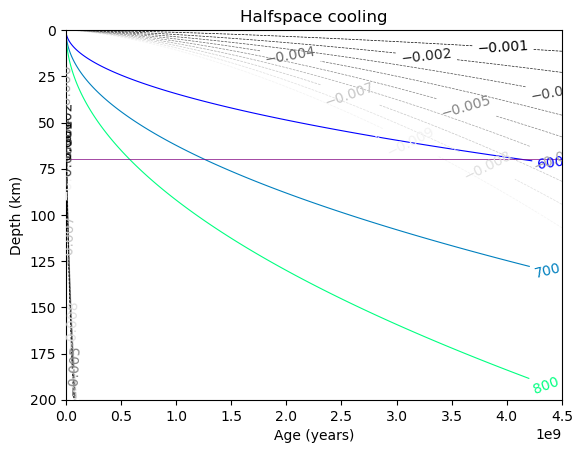

In [17]:
cs = plt.contour(t, d/1e3, T, levels = [600, 700, 800], cmap = "winter", linewidths=0.8)
cs1 = plt.contour(t, d/1e3, Tdot, levels=np.linspace(-0.01, -0.001, 10), cmap="Greys", linewidths = 0.5, linestyles = '--')
plt.clabel(cs)
plt.clabel(cs1)
plt.title('Halfspace cooling')
plt.gca().invert_yaxis()
# cbar = plt.colorbar()
# cbar.set_label("Temperature (deg C)")
plt.axhline(70, age[0], age[-1], color='purple', linewidth=0.5)
plt.xlabel("Age (years)")
plt.ylabel("Depth (km)")
plt.show()

Note: Cooling rate calculated for time intrval of 0.45 Myr.

### 1.1 Strain rate due to lithospheric contraction

In [57]:
Ls = 70               ## in km
Rp = 6051.8            ## in km
alpha = 3e-5          ## volumetric thermal expansion coefficient in /K
V = (4/3) * np.pi * Rp**3 - (Rp-Ls)**3
print(V)
cooling_rate = 1e-9 

strainrate_lith =  ((alpha* cooling_rate * V) / (4*np.pi*Ls*(Rp - Ls/2)**2))/(365.25*24*60*60)
print("Strain rate per second = ", strainrate_lith)

714374989601.4335
Strain rate per second =  2.1325757855387948e-20


In [85]:
def moment2magnitude(m0):
    mw = 2/3 * (np.log10(m0) - 9.1)
    return mw

def moment2surmagnitude(m0):
    ms = np.log10(m0*.001)-19.46
    return ms

def adot_parameter(strainrate, seisvolume, b = 0.67, shearmod = 7e10, m0_max=10e20):
    a = (1-b)/b * np.power(mo_max, b-1) * strainrate * shearmod * seisvolume 
    return a

def N_events_m0(m0_min, m0_max, adot, b=0.67):
    m0_del = m0_max - m0_min
    n = adot * (np.power(m0_min, -b) - np.power(m0_max, -b))
    return n

In [86]:
### calculation of a (Phillips 1991)
b = 0.67
m0_max = 10e20
del_t = 12 * 30 * 24 * 60 * 60                ## 2 months

adot = adot_parameter(strainrate_lith, V)
n_events = N_events_m0(10e10, m0_max, adot)
print(n_events)

2.6324965193024772e-12


[ -1.46  -6.46 -11.46 -12.46]
